In [1]:
pip install nltk

In [2]:
# import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# create a stopwords list
stopwords = nltk.corpus.stopwords.words('english') #are lowercase
nltkStopwordsWithAdditions = stopwords + \
                             ['la', #comes up a lot (like 'la-la-la') but isn't a word so don't include it
                              'eh', 'ayy', #same as 'la'. 'eh' as in pronounced like 'aye'
                              'oh', 'ooh', #an exclamation with no real meaning but ranks highly so exclude
                              'us', 'u', 'ya', #different forms of 'you' which is a stopword
                              'na', 'ta', #alt forms of 'to' which is a stopword. From 'gonna', 'wanna', 'gotta'
                              'nah', #usage a mix of a sung-only word and slang for 'no' which is a stopword
                              'po', 'woo', 'doo', 'ah', 'uh', 'uhh' #sung-only words
                             ]

In [6]:
# add data from csv file
lyrics_path = "/content/drive/MyDrive/IRTM/kendrick_lamar_lyrics_with_filtered.csv"

In [7]:
# load the data
data = pd.read_csv(lyrics_path)
data.head(10)

,name,lyrics,album,year,album_name,pre-processed_lyrics
0,HUMBLE.,nobody pray for me it been that day for me wa...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,[Intro]\nNobody pray for me\nIt been that day ...
1,​m.A.A.d city,if pirus and crips all got along theyd probab...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Part I: Produced by Sounwave]\n[Intro: Kendri...
2,Swimming Pools (Drank),pour up pass out now i done grew up round som...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by T-Minus]\n[Intro]\nPour up (Drank...
3,DNA.,i got i got i got i got loyalty got royalty i...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,"[Verse 1]\nI got, I got, I got, I got—\nLoyalt..."
4,Money Trees,uh me and my niggas tryna get it ya bish home...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by DJ Dahi]\n[Verse 1: Kendrick Lama...
5,XXX.,america god bless you if its good to ya ameri...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,[Intro: Bēkon & Kid Capri]\nAmerica\nGod bless...
6,"Bitch, Don’t Kill My Vibe",i am a sinner whos probably gonna sin again l...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Sounwave]\n[Chorus: Kendrick Lama...
7,Poetic Justice,every second every minute man i swear that sh...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Scoop DeVille & Sounwave]\n[Intro...
8,King Kunta,i got a bone to pick i dont want you monkey m...,"{'api_path': '/albums/120991', 'cover_art_url'...",2015,To Pimp a Butterfly,[Produced by Sounwave; Additional production b...
9,LOVE.,damn love or lust damn all of us give me a ru...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,"[Intro: Kendrick Lamar]\nDamn, love or lust\nD..."


In [8]:
tokenizer = RegexpTokenizer(r'\w+')
i=[]
for ind in range(len(data['lyrics'])):
  i.append(tokenizer.tokenize((str(data['lyrics'].loc[ind]))))
data["tokens"]=i
print(i)

[['nobody', 'pray', 'for', 'me', 'it', 'been', 'that', 'day', 'for', 'me', 'way', 'ayy', 'i', 'remember', 'syrup', 'sandwiches', 'and', 'crime', 'allowances', 'finesse', 'a', 'nigga', 'with', 'some', 'counterfeits', 'but', 'now', 'im', 'countin', 'this', 'parmesan', 'where', 'my', 'accountant', 'lives', 'in', 'fact', 'im', 'downin', 'this', 'd', 'ussé', 'with', 'my', 'boo', 'bae', 'tastes', 'like', 'kool', 'aid', 'for', 'the', 'analysts', 'girl', 'i', 'can', 'buy', 'your', 'ass', 'the', 'world', 'with', 'my', 'paystub', 'ooh', 'that', 'pussy', 'good', 'wont', 'you', 'sit', 'it', 'on', 'my', 'taste', 'bloods', 'i', 'get', 'way', 'too', 'petty', 'once', 'you', 'let', 'me', 'do', 'the', 'extras', 'pull', 'up', 'on', 'your', 'block', 'then', 'break', 'it', 'down', 'we', 'playin', 'tetris', 'am', 'to', 'the', 'pm', 'pm', 'to', 'the', 'am', 'funk', 'piss', 'out', 'your', 'per', 'diem', 'you', 'just', 'gotta', 'hate', 'em', 'funk', 'if', 'i', 'quit', 'your', 'bm', 'i', 'still', 'ride', 'merce

In [9]:
data.head(10)

,name,lyrics,album,year,album_name,pre-processed_lyrics,tokens
0,HUMBLE.,nobody pray for me it been that day for me wa...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,[Intro]\nNobody pray for me\nIt been that day ...,"[nobody, pray, for, me, it, been, that, day, f..."
1,​m.A.A.d city,if pirus and crips all got along theyd probab...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Part I: Produced by Sounwave]\n[Intro: Kendri...,"[if, pirus, and, crips, all, got, along, theyd..."
2,Swimming Pools (Drank),pour up pass out now i done grew up round som...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by T-Minus]\n[Intro]\nPour up (Drank...,"[pour, up, pass, out, now, i, done, grew, up, ..."
3,DNA.,i got i got i got i got loyalty got royalty i...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,"[Verse 1]\nI got, I got, I got, I got—\nLoyalt...","[i, got, i, got, i, got, i, got, loyalty, got,..."
4,Money Trees,uh me and my niggas tryna get it ya bish home...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by DJ Dahi]\n[Verse 1: Kendrick Lama...,"[uh, me, and, my, niggas, tryna, get, it, ya, ..."
5,XXX.,america god bless you if its good to ya ameri...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,[Intro: Bēkon & Kid Capri]\nAmerica\nGod bless...,"[america, god, bless, you, if, its, good, to, ..."
6,"Bitch, Don’t Kill My Vibe",i am a sinner whos probably gonna sin again l...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Sounwave]\n[Chorus: Kendrick Lama...,"[i, am, a, sinner, whos, probably, gonna, sin,..."
7,Poetic Justice,every second every minute man i swear that sh...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Scoop DeVille & Sounwave]\n[Intro...,"[every, second, every, minute, man, i, swear, ..."
8,King Kunta,i got a bone to pick i dont want you monkey m...,"{'api_path': '/albums/120991', 'cover_art_url'...",2015,To Pimp a Butterfly,[Produced by Sounwave; Additional production b...,"[i, got, a, bone, to, pick, i, dont, want, you..."
9,LOVE.,damn love or lust damn all of us give me a ru...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,"[Intro: Kendrick Lamar]\nDamn, love or lust\nD...","[damn, love, or, lust, damn, all, of, us, give..."


In [10]:
word_counts = []
unique_word_counts = []
for i in range (0, len(data)):
    word_counts.append(len(data.iloc[i]['lyrics'].split()))
    unique_word_counts.append(len(set(data.iloc[i]['lyrics'].split())))
data['Word Counts'] = word_counts
data['Unique Word Counts'] = unique_word_counts

In [11]:
all_words = [word for tokens in data['tokens'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data['tokens']]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

88512 words total, with a vocabulary size of 8180
Max sentence length is 2244


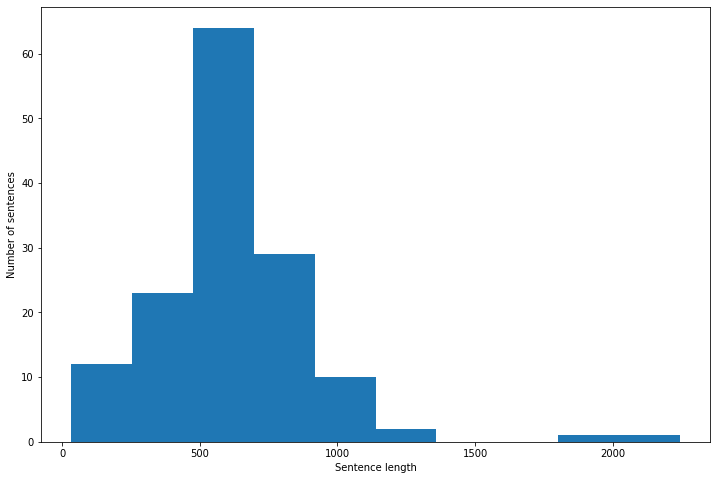

In [12]:
fig = plt.figure(figsize=(12, 8)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [13]:
data = data.sort_values('year')
data.head(10)

,name,lyrics,album,year,album_name,pre-processed_lyrics,tokens,Word Counts,Unique Word Counts
121,Blow Them Horns,bear witness watch me get it in like underage...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,[Verse 1: Kendrick Lamar]\nBear witness\nWatch...,"[bear, witness, watch, me, get, it, in, like, ...",635,304
130,Man of the Hour,blewell jeans moby dick stitching trigger fin...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Verse 1]\nBlewell jeans, Moby Dick stitching\...","[blewell, jeans, moby, dick, stitching, trigge...",183,122
127,Prototype,they say that im the one and you you are the ...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,[Hook: Kendrick Lamar]\nThey say that I'm the ...,"[they, say, that, im, the, one, and, you, you,...",590,283
124,Hard Body,oh shit awwwww you motherfucker the next one ...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Intro]\nThat’s where you headed boy, to pine ...","[oh, shit, awwwww, you, motherfucker, the, nex...",657,287
126,Gz and Hustlas,what i look like a sucker to you nigga fuck y...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Intro: Kendrick Lamar]\nWhat I look like, a s...","[what, i, look, like, a, sucker, to, you, nigg...",644,315
131,Get Throwed,you know im surgical with this bitch jake how...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,[Skit]\nYou know I'm surgical with this bitch ...,"[you, know, im, surgical, with, this, bitch, j...",555,289
128,Hpnotiq,10 9 8 7 6 5 4 3 2 1 i kick a funky friendly ...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Intro]\n\n10,9,8\n7,6,5\n4,3,2\n1\n\n[Verse 1...","[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, i, kick, a, fu...",322,193
109,Imagine,i sit on the studio couch ask myself what the...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,[Verse 1: K. Dot]\nI sit on the studio couch\n...,"[i, sit, on, the, studio, couch, ask, myself, ...",668,337
136,Interview with DJ Dave Part 1,man how long you been how long you been rappi...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[DJ Dave]\nMan, how long you been, how long yo...","[man, how, long, you, been, how, long, you, be...",33,25
110,Blame God,been ready jay i been ready hov i been ready ...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Intro: Kendrick Lamar]\nBeen ready\nJay, I be...","[been, ready, jay, i, been, ready, hov, i, bee...",610,289


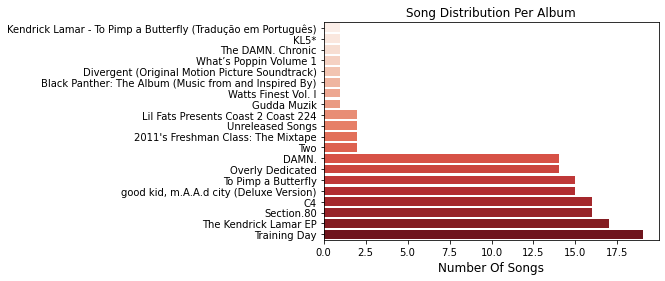

In [14]:
sns.countplot(y=data['album_name'].values, order=data['album_name'].value_counts(ascending=True).index, palette='Reds')
plt.title('Song Distribution Per Album')
plt.xlabel('Number Of Songs', fontsize=12)
plt.show()

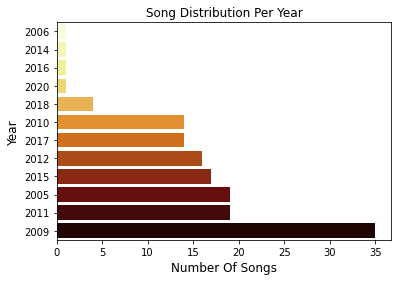

In [15]:
sns.countplot(y=data['year'].values, order=data['year'].value_counts(ascending=True).index, palette='afmhot_r')
plt.title('Song Distribution Per Year')
plt.ylabel('Year', fontsize=12)
plt.xlabel('Number Of Songs', fontsize=12)
plt.show()